In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

In [3]:
plt.set_cmap('coolwarm')
filename = 'dynversetree'
method = 'drift'

data = pd.read_csv(f'~/Documents/CAM/Year1/GeneticTrees/TITesting.nosync/{filename}/{filename}.csv').values
data = TSNE(n_components=2,n_iter=500,init='pca',learning_rate=1000).fit_transform(data)

L = pd.read_csv(f"~/Documents/CAM/Year1/GeneticTrees/TITesting.nosync/{filename}/EBMFfactors/{method}L.csv").values
F = pd.read_csv(f"~/Documents/CAM/Year1/GeneticTrees/TITesting.nosync/{filename}/EBMFfactors/{method}F.csv").values
pve = pd.read_csv(f"~/Documents/CAM/Year1/GeneticTrees/TITesting.nosync/{filename}/EBMFfactors/{method}pve.csv").values[:,0]
# srt = np.argsort(pve)[::-1]
srt = np.arange(len(pve))

numfactors = L.shape[1]
num_rows = int(numfactors/3)*3
plt.figure(figsize=(15,num_rows*5))
for k,factor,loading,pv in zip(range(numfactors),F.T[srt],L.T[srt],pve[srt]):
    ax = plt.subplot(num_rows,3,k+1)
    _max = max(abs(loading))
    ax.scatter(data[:,0],data[:,1],c=loading,alpha=.7,s=3,vmin=-_max,vmax=_max)
    ax.set_title(f'factor {k+1}, pve {np.round(pv,2)}')
plt.suptitle(filename.title() + method.title())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/suzannastep/Documents/CAM/Year1/GeneticTrees/TITesting.nosync/dynversetree/dynversetree.csv'

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

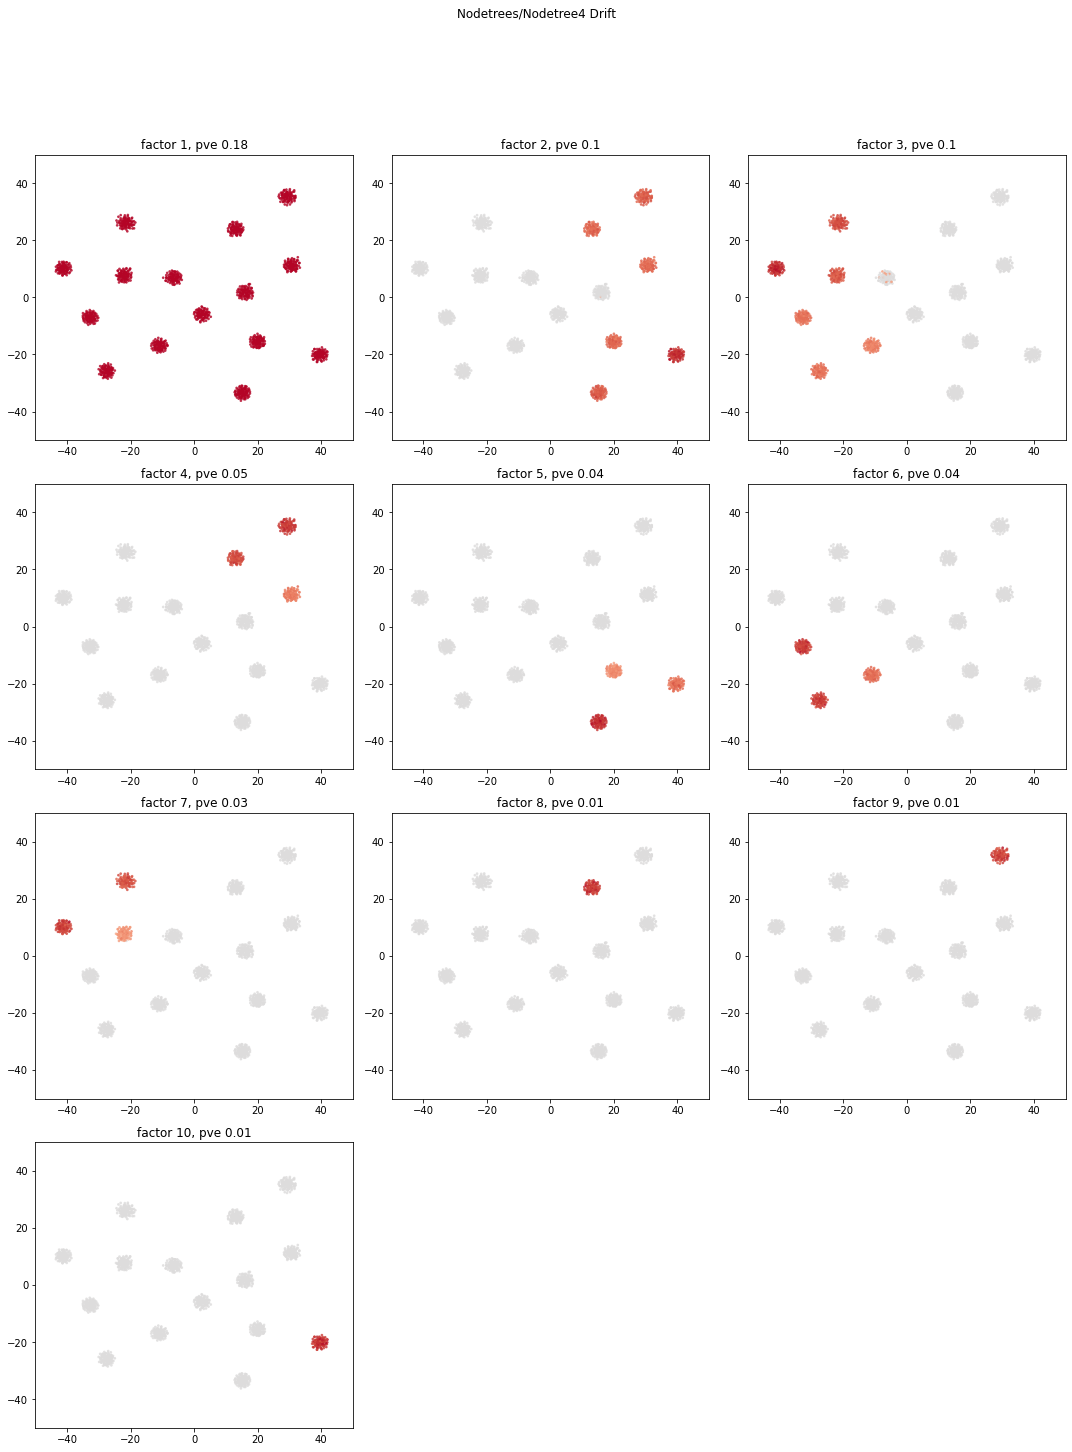

<Figure size 432x288 with 0 Axes>

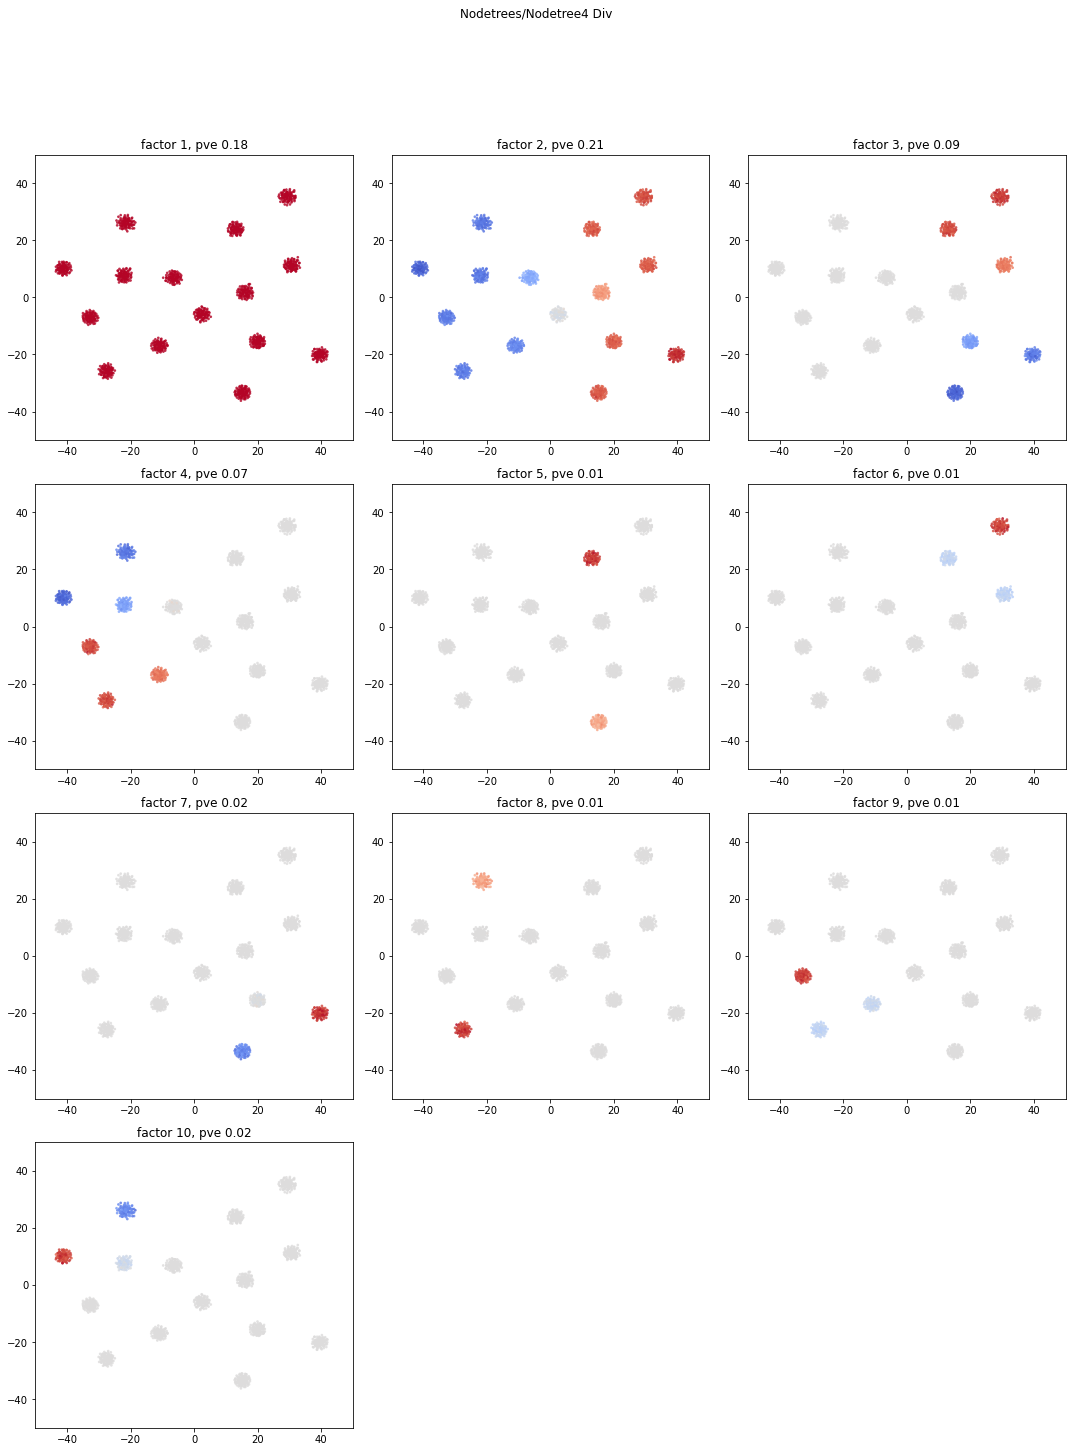

In [55]:
def plot_ebnm_results(filename,method="drift"):
    #load computed factors and loadings
    if filename[-9:-1] == "NodeTree":
        data = pd.read_csv(f'../data/{filename + "/"+ filename[-9:] }.csv')
    else:
        data = pd.read_csv(f'../data/{filename}.csv')
    L = pd.read_csv(f"../output/{filename}/EBMFfactors/{method}L.csv").values
    F = pd.read_csv(f"../output/{filename}/EBMFfactors/{method}F.csv").values
    pve = pd.read_csv(f"../output/{filename}/EBMFfactors/{method}pve.csv").values[:,0]

    #sort accorinding to pve
    srt = np.arange(len(pve))

    #plot
    plt.set_cmap('coolwarm')
    numfactors = L.shape[1]
    num_rows = int(numfactors/3)*3
    plt.figure(figsize=(15,num_rows*5))
    for k,factor,loading,pv in zip(range(numfactors),F.T[srt],L.T[srt],pve[srt]):
        ax = plt.subplot(num_rows,3,k+1)
        _max = max(abs(loading))
        ax.scatter(data.tsne0,data.tsne1,c=loading,alpha=.7,s=3,vmin=-_max,vmax=_max)
        ax.set_title(f'factor {k+1}, pve {np.round(pv,2)}')
        ax.set_xlim(-50,50)
        ax.set_ylim(-50,50)
    plt.suptitle(filename.title() + ' '+ method.title())
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
plot_ebnm_results("NodeTrees/NodeTree4","drift")
plot_ebnm_results("NodeTrees/NodeTree4","div")

In [44]:
def plot_ebnm_results(filename,method="drift"):
    #load computed factors and loadings
    if filename[-9:-1] == "NodeTree":
        data = pd.read_csv(f'../data/{filename + "/"+ filename[-9:] }.csv')
    else:
        data = pd.read_csv(f'../data/{filename}.csv')
    L = pd.read_csv(f"../output/{filename}/EBMFfactors/{method}L.csv").values
    F = pd.read_csv(f"../output/{filename}/EBMFfactors/{method}F.csv").values
    pve = pd.read_csv(f"../output/{filename}/EBMFfactors/{method}pve.csv").values[:,0]

    #sort accorinding to pve
    srt = np.arange(len(pve))

    #plot
    plt.set_cmap('coolwarm')
    numfactors = L.shape[1]
    num_rows = int(numfactors/3)*3
    plt.figure(figsize=(15,num_rows*5))
    for k,factor,loading,pv in zip(range(numfactors),F.T[srt],L.T[srt],pve[srt]):
        ax = plt.subplot(num_rows,3,k+1)
        _max = max(abs(loading))
        ax.scatter(data.tsne0,data.tsne1,c=loading,alpha=.7,s=3,vmin=-_max,vmax=_max)
        ax.set_title(f'factor {k+1}, pve {np.round(pv,2)}')
        ax.set_xlim(-50,50)
        ax.set_ylim(-50,50)
    plt.suptitle(filename.title() + ' '+ method.title())
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [45]:
ls ../data/NodeTrees

NodeTree1/ NodeTree3/ NodeTree5/ NodeTree7/ NodeTree9/
NodeTree2/ NodeTree4/ NodeTree6/ NodeTree8/


<Figure size 432x288 with 0 Axes>

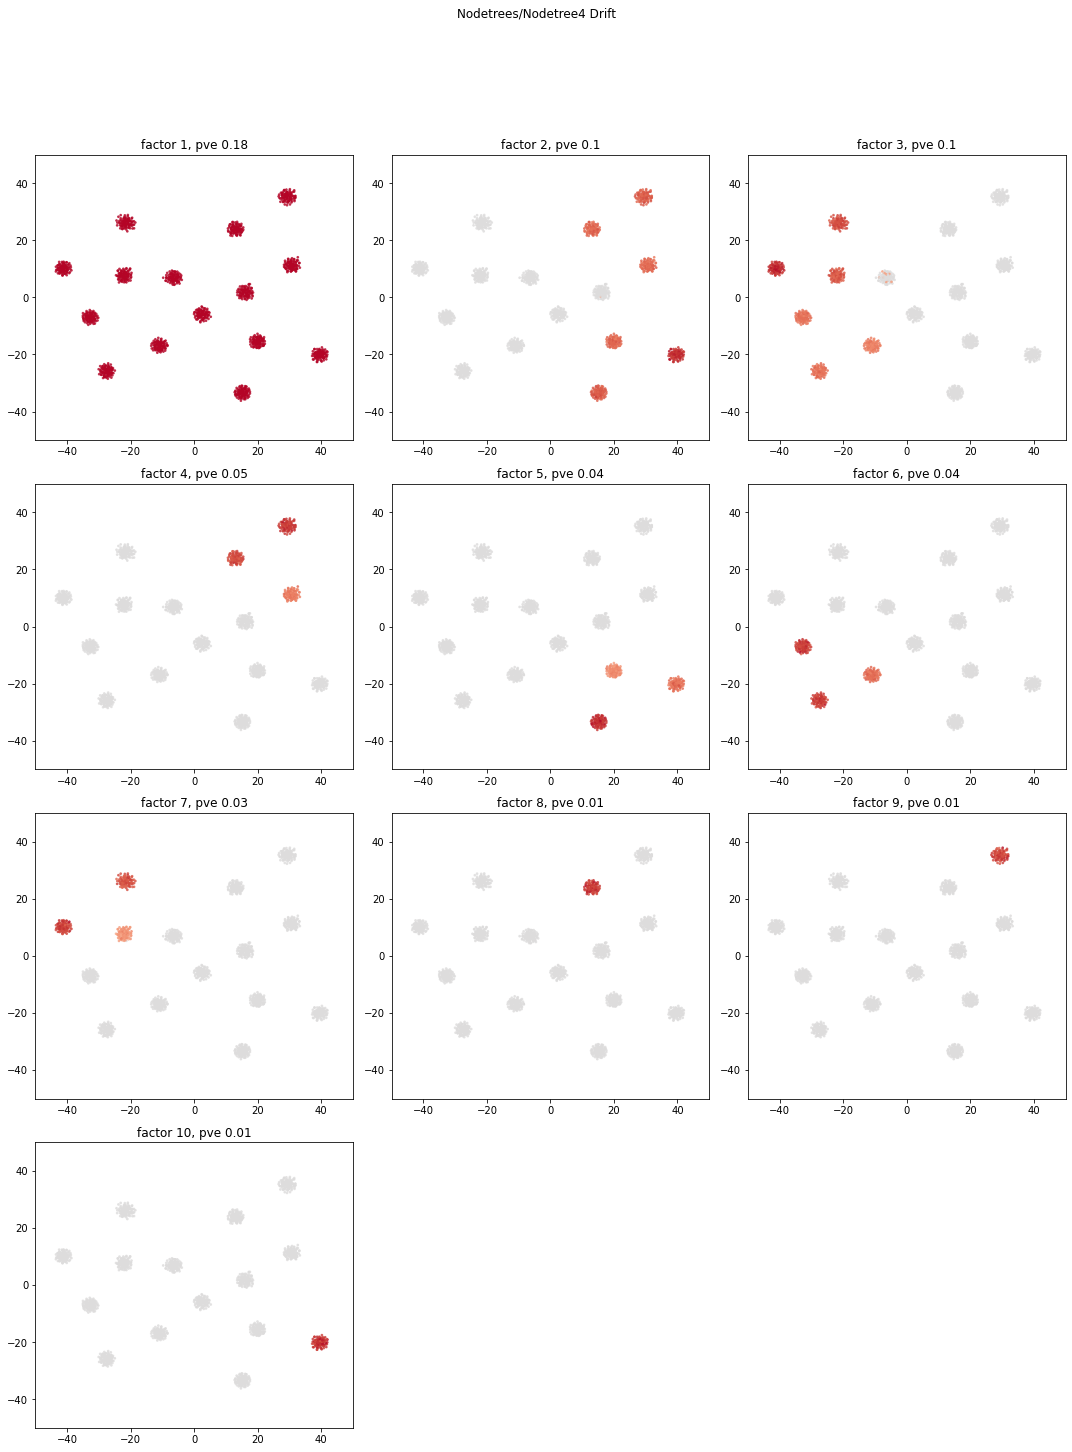

In [51]:
plot_ebnm_results("NodeTrees/NodeTree4","drift")

<Figure size 432x288 with 0 Axes>

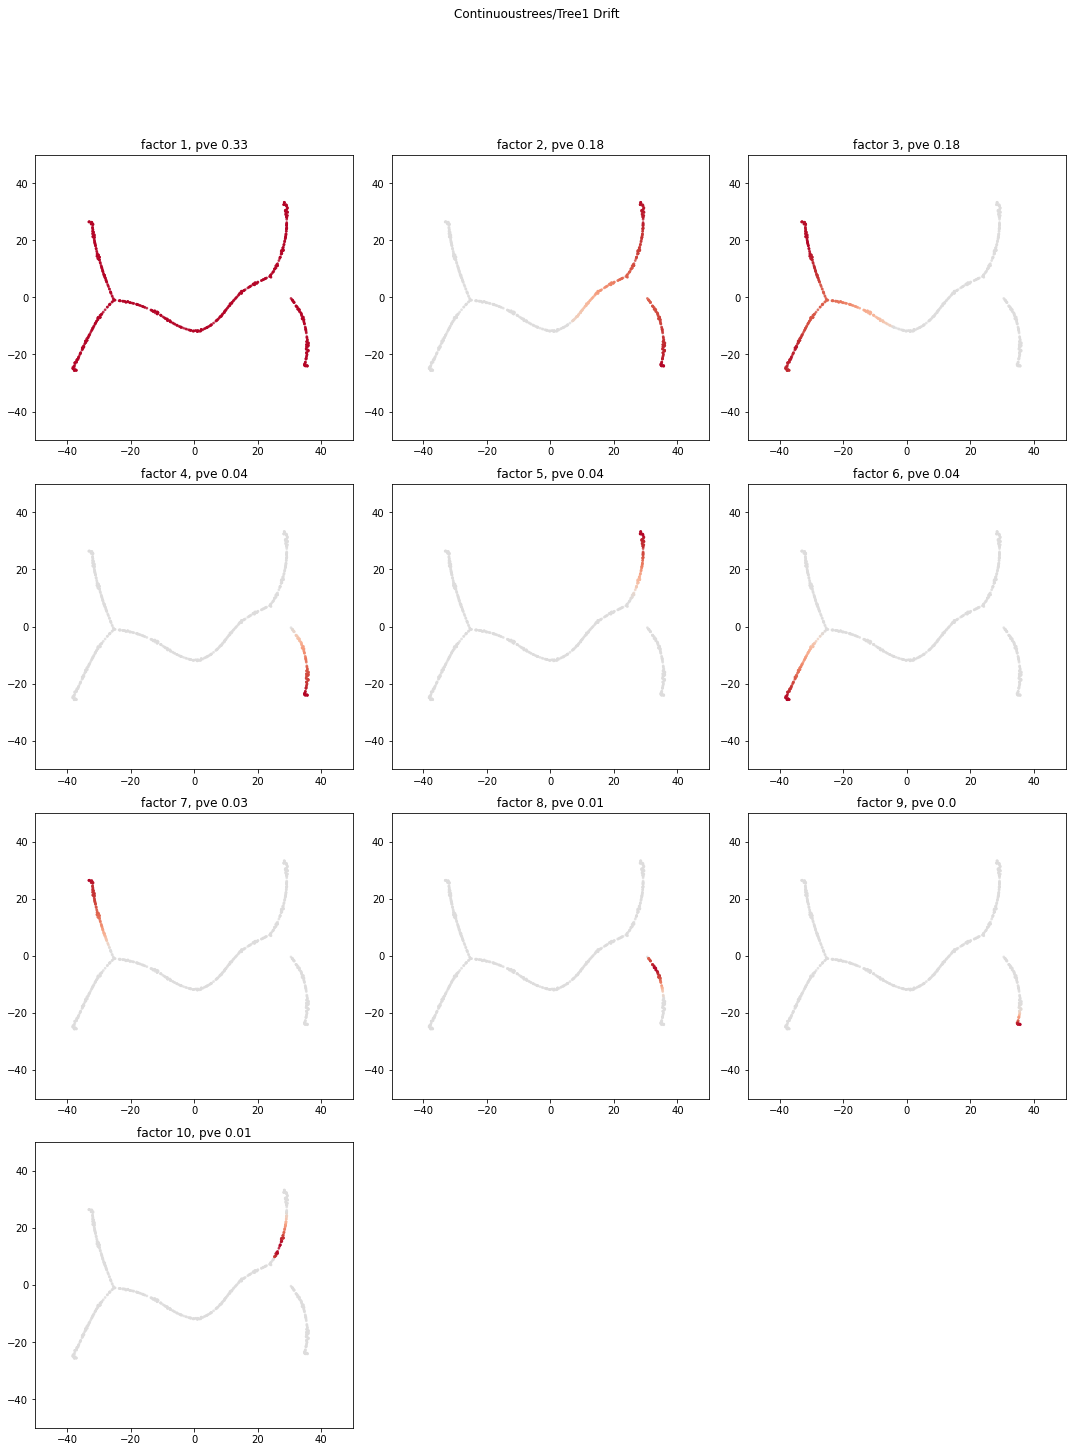

<Figure size 432x288 with 0 Axes>

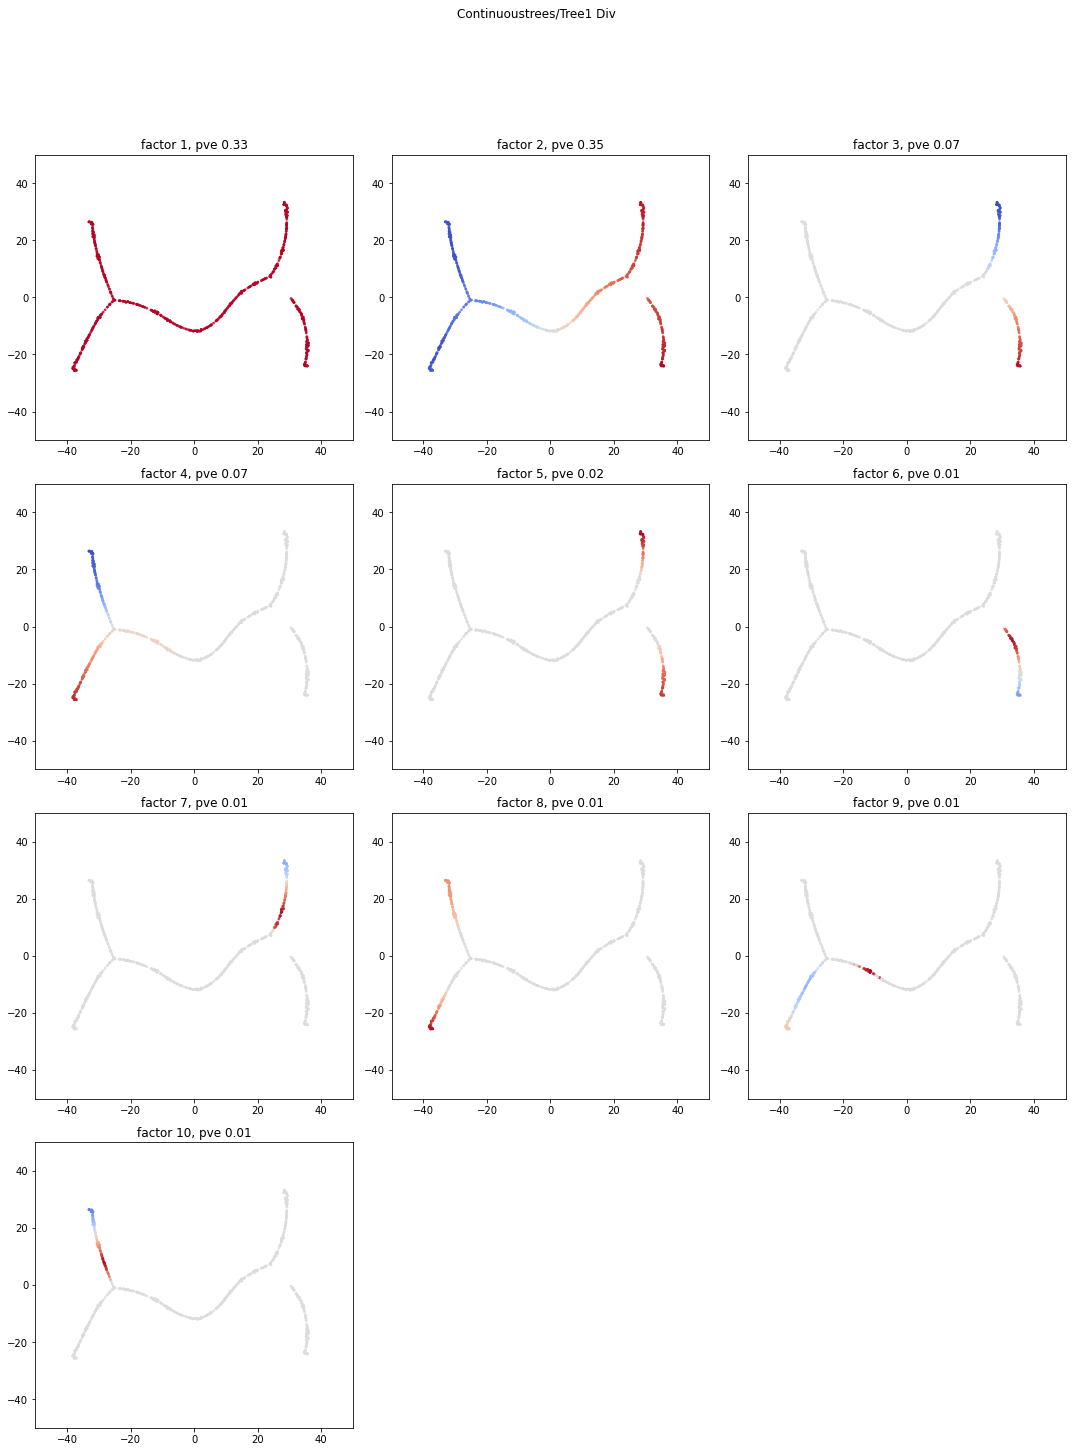

In [56]:
plot_ebnm_results("ContinuousTrees/tree1","drift")
plot_ebnm_results("ContinuousTrees/tree1","div")

In [14]:
ls ../output/NodeTrees/NodeTree1

EBMFfactors/


<Figure size 432x288 with 0 Axes>

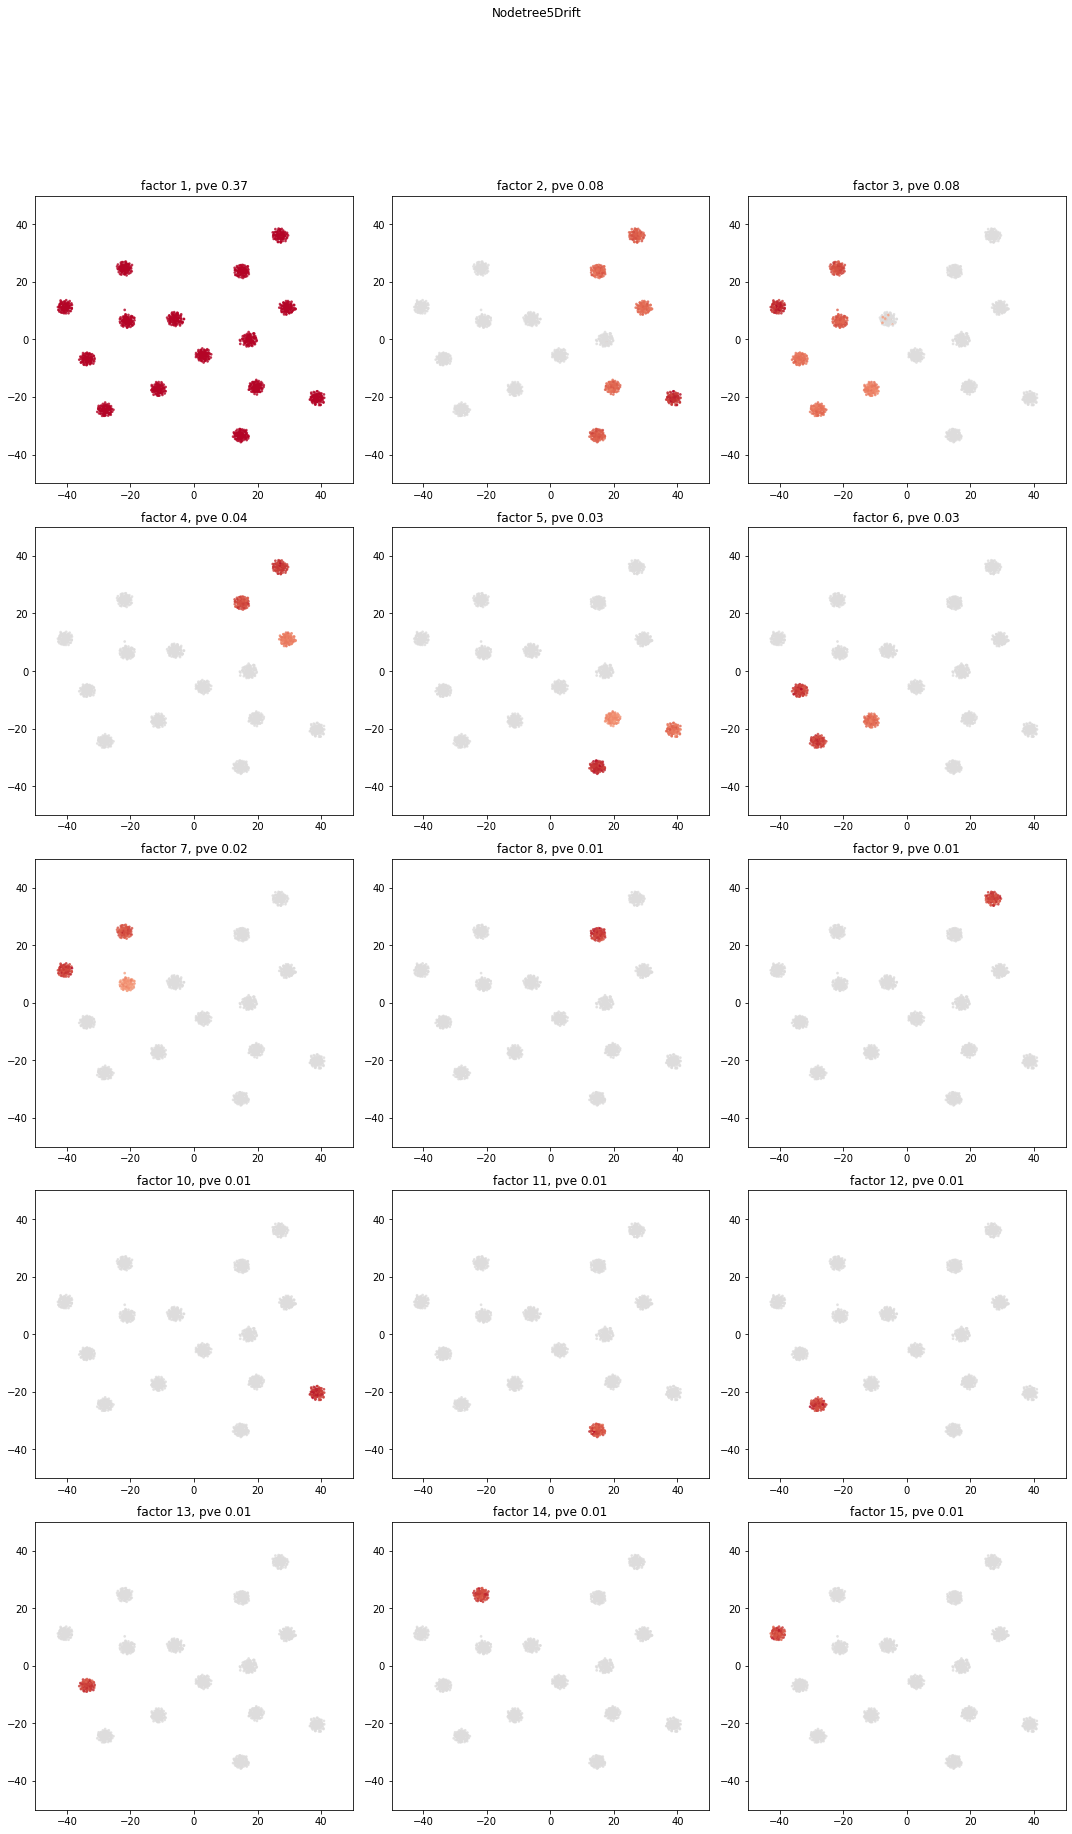

In [45]:
#filenames: tree1,tree2,tree3,tree4,NodeTree1 to NodeTree9
filename = 'NodeTree5'
#drift, cov (does divergence covariance), '' does divergence
method = 'drift'

data = pd.read_csv(f'~/Documents/CAM/Year1/GeneticTrees/TITesting.nosync/{filename}/{filename}.csv')

L = pd.read_csv(f"~/Documents/CAM/Year1/GeneticTrees/TITesting.nosync/{filename}/EBMFfactors/{method}L.csv").values
F = pd.read_csv(f"~/Documents/CAM/Year1/GeneticTrees/TITesting.nosync/{filename}/EBMFfactors/{method}F.csv").values
pve = pd.read_csv(f"~/Documents/CAM/Year1/GeneticTrees/TITesting.nosync/{filename}/EBMFfactors/{method}pve.csv").values[:,0]
# srt = np.argsort(pve)[::-1]
srt = np.arange(len(pve))

plt.set_cmap('coolwarm')
numfactors = L.shape[1]
num_rows = int(numfactors/3)*3
plt.figure(figsize=(15,num_rows*5))
for k,factor,loading,pv in zip(range(numfactors),F.T[srt],L.T[srt],pve[srt]):
    ax = plt.subplot(num_rows,3,k+1)
    _max = max(abs(loading))
    ax.scatter(data.tsne0,data.tsne1,c=loading,alpha=.7,s=3,vmin=-_max,vmax=_max)
    ax.set_title(f'factor {k+1}, pve {np.round(pv,2)}')
    ax.set_xlim(-50,50)
    ax.set_ylim(-50,50)
plt.suptitle(filename.title() + method.title())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()